In [101]:
import numpy as np # Импорт библиотеки для работы с матрицами
import matplotlib.pyplot as plt # Импорт библиотеки для работы отображения графиков
from tensorflow.keras.datasets import fashion_mnist # Импорт датасета   
from tensorflow import keras # Импорт библиотеки для обучения нейронной сети
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D # Импорт слоев для создания архитектуры

In [102]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # Загрузка датасета

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [103]:
x_train[0] # Матричное представление первого изображения

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [104]:
y_train[0] # К какой категории относится первое изображение

9

In [105]:
# Словарь для конвертирования категории в название одежды
cat_to_str = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

На изображении Ankle boot


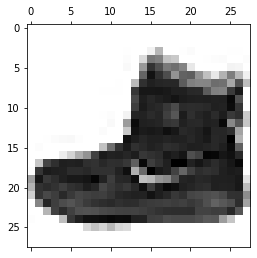

In [106]:
image_number = 0 # выбор изображения
print(f'На изображении {cat_to_str[y_train[image_number]]}') # Вывод названия одежды на экран
plt.matshow(x_train[image_number], cmap=plt.cm.binary) # Вывод изображения на экран (cmap отображает в чб формате, если этот параметр убрать, то будет изображение сине-зеленое)

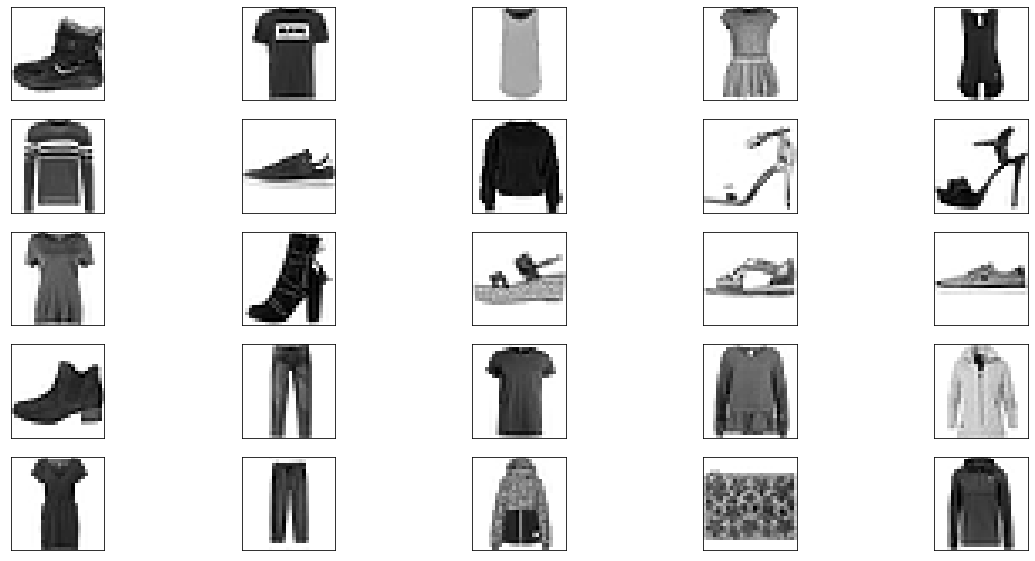

In [107]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(20,10)) # Увеличение размера изображения
for i in range(25): # Цикл на выведение изображения
    plt.subplot(5,5,i+1) # Создание изображения внутри основного (5,5 означает 5 столбцов по 5 строк. i+1 Выбор на какое место ставить изображение, начиная с 1)
    plt.xticks([]) # Удаление осей координат по х
    plt.yticks([]) # Удаление осей координат по у
    plt.imshow(x_train[i], cmap=plt.cm.binary) # Вывод изображения на экран

plt.show() # Вывод основного изображения на экран

In [108]:
y_train_cat = keras.utils.to_categorical(y_train, 10) # Перевод ответов в категориальный вектор
y_test_cat = keras.utils.to_categorical(y_test, 10) # Перевод ответов в категориальный вектор

Пояснение <br>
Допустим на изображении объект, относящийся к 5 категории. Сейчас y имеет только одно число (5 соответсвенно), а для того чтобы нейронная сеть могла выдавать ответ в вероятностном соотношении, нужно превратить его в вектор. <br>
После преобразования ответ 5 получается [0,0,0,0,0,1,0,0,0,0]

In [109]:
x_train = np.expand_dims(x_train, axis=3) # Добавление еще одной оси
x_test = np.expand_dims(x_test, axis=3) # Добавление еще одной оси

print(x_train.shape)

(60000, 28, 28, 1)


Пояснение <br>
Нейронная сеть принимает на вход трехмерный вектор. В данном случае датасет имее 60 000 изображений 28х28 размером. Нужно указать какое значение находится в ячейках 28х28. Так как это изображение в градации серого, то ячейка имеет только яркостную составляющую (1 соответственно). Поэтому для нейронной сети указывается размер 28 ширина 28 высота 1 значение, итого (28,28,1) 3 измерения. Если бы было RGB изображение, то соответственно (28,28,3)

In [110]:
model = keras.Sequential([ #Создание последовательной модели (класс Sequentional)
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)), # Сверточный слой
    MaxPooling2D(pool_size=(2, 2), strides=2), # Слой пулинга
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),  # Сверточный слой
    MaxPooling2D(pool_size=(2, 2), strides=2), # Слой пулинга
    Flatten(), # Слой преобразования матрицы в вектор, так как на полносвязный слой Dense должен подаваться одинарный вектор
    Dense(units=128, activation='relu'),
    Dense(units=10,  activation='softmax') # Выходной слой
])

print(model.summary()) # Вывод параметром модели на экран

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

Пояснение <br>
Conv2D - Свертоыный слой для изображений<br>
Параметры:<br>
filters - Количество ядер свертки в слое, то есть скольео карт признаков (Feature Maps) будет созданной <br>
kernel_size - Размер ядра свертки<br>
padding - Так как при операции свертки размер исходного изображения уменьшается, использование "Подложки" со значением 'same' Добавляет по краям черные полосы (значение 0), для сохрания исходного размера изображения<br>
<br>
MaxPooling2D - Слой пулинга<br>
Параметры:<br>
pool_size - Размер ядра пулинга (2х2 означает, что изображение уменьшится в 2 раза) <br>
strides - Шаг пулинга. По умолчанию 1. На сколько "клеток" сдвинуть ядро при следующей операции. (Такой параметр также есть и у сверточного слоя)<br>
Flatten - Слой преобразования матрицы в вектор, так как на полносвязный слой Dense должен подаваться одинарный вектор<br>
Dense(units=128, activation='relu') - Полносвязный слой<br>
Dense(units=10,  activation='softmax') - Выходной слой. Параметр units должен быть равен количеству ответов, в зависимости от задачи. В этом примере представленно 10 различных категорий одежды, соответственно units = 10. Activation=softmax, необходимо для представления ответа в вероятностном виде

In [111]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Пояснение <br>
Метод для компилирования модели<br>
Необходимо указать оптимизатор. ("Формула", по которой будет вычисляться ошибка обратного распространения (Back propagation)). Самым популярным является 'Adam' и вообще почти только он и используется<br>
Loss - Функция потерь. Так как классифицируется объект из нескольких вариантов, используется категориальная кроссэнтропия.<br>
Какие функции потерь есть https://keras.io/api/losses/<br>
Metrics - Метрики для более "человекопонятного" представления обучения нейронной сети. Можно указать несколько в листе, пример ['метрика1','метрика2',...'метрика n']<br>
Какие метрики есть  https://keras.io/api/metrics/<br> https://keras.io/api/metrics/classification_metrics/ <br>

Вызов метрик через keras.metrics <br>
Примеры<br>
keras.metrics.Precision(thresholds=0)<br>
keras.metrics.AUC(from_logits=True)<br>
Все есть в документации. Последняя ссылка

In [112]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2) # Обучение модели


Epoch 1/10
1500/1500 [==============================] - 24s 15ms/step - loss: 0.4247 - accuracy: 0.8458 - val_loss: 0.3113 - val_accuracy: 0.8881
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2756 - accuracy: 0.8980 - val_loss: 0.2610 - val_accuracy: 0.9038
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2309 - accuracy: 0.9147 - val_loss: 0.2376 - val_accuracy: 0.9133
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1965 - accuracy: 0.9275 - val_loss: 0.2374 - val_accuracy: 0.9157
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1689 - accuracy: 0.9367 - val_loss: 0.2371 - val_accuracy: 0.9172
Epoch 6/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1445 - accuracy: 0.9460 - val_loss: 0.2407 - val_accuracy: 0.9157
Epoch 7/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1194 - accuracy: 0.9559 - val_loss: 0.2401 -

Пояснение <br>
x_train - Изображение<br>
y_train_cat - Ответ<br>
batch_size - Сколько сэмплов подается за один раз для обучения. Чем больше, тем точнее нейросеть выбирает коэффициенты и тем больше нужно вычислительных ресурсов<br>
epochs - Сколько эпох обучается нейронная сеть<br>
validation_split - Разделение выборки на обучающую и тестовую. 0.2 означает, что 20% отдается под тестирование<br>

In [113]:
model.evaluate(x_test, y_test_cat) # Оценка обученной модели на данных, на которых модель не обучалась
# Вывод показывает метрики, которые были указанны в функции compile. В этом случае Loss и Accuracy

313/313 [==============================] - 5s 15ms/step - loss: 0.3097 - accuracy: 0.9138


[0.30973362922668457, 0.9138000011444092]

In [114]:
model.weights[0] # Вывод весов первого слоя

<tf.Variable 'conv2d_10/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.07649226,  0.06046552, -0.13521887, -0.15445007,
          -0.02632809,  0.05827362,  0.01469961, -0.11829438,
           0.33286798,  0.01760646,  0.06856049, -0.18934707,
          -0.05947559,  0.01698248,  0.04345855, -0.2651542 ,
          -0.02763209,  0.4344086 ,  0.19803554,  0.13426499,
           0.55999   ,  0.05572784,  0.04645905, -0.19499728,
           0.08940145,  0.09901545,  0.08639567, -0.78951854,
          -0.15533952,  0.19848081,  0.11172824, -0.04443942]],

        [[ 0.02623648,  0.16119815,  0.05053032,  0.05682308,
           0.25897455,  0.20332576, -0.32262427,  0.19752438,
          -0.01720496, -0.55469525,  0.20631598,  0.15533914,
          -0.31092167, -0.11966891, -0.21429572, -0.3275068 ,
           0.30640996,  0.08649472, -0.16120546,  0.21446042,
          -0.07710926,  0.02714295, -0.14002196, -0.2724646 ,
          -0.02632882, -0.21898235,  0.01350999,  0.2

[[7.6696427e-09 1.1140703e-11 2.3334085e-10 6.9924223e-12 2.6471143e-11
  2.5523163e-06 1.1488906e-08 7.6236392e-06 6.3669667e-11 9.9998975e-01]]
9
Ankle boot


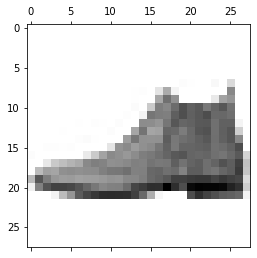

In [115]:
n = 0 # Номер изображения
x = np.expand_dims(x_test[n], axis=0) # Добавления нулевого пространства, так как при обучении модели дается N изображений, размера (28,28,1). Для подачи одного изображения, нужно 'обернуть' его в [] - [(28,28,1)]
res = model.predict(x) # Предсказание нейронной сети

print(res) # Вывод нейронной сети, (вероятностный вектор)
print(np.argmax(res)) # Вывод индекса с наибольшем значением, будет соответственно равен категории изображения
print(cat_to_str[np.argmax(res)]) # Вывод названия категории

plt.matshow(x_test[n].reshape(x_test[n].shape[0], x_test[n].shape[1]), cmap=plt.cm.binary) # Вывод изображения на экран
# в подаче в plt используется reshape для того, чтобы подать матрицу. 
# Потому что вначале мы преобразовали матрицу 28x28 в (28,28,1). Теперь нужно выполнить обратный процесс. Shape применяется для автоматизации, можно просто написать 28
plt.show()

In [116]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20]) # Вывод на экран первых 20 предсказанных ответов
print(y_test[:20]) # Вывод на экран первых 20 истинных ответов

(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 2 1 2 4 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [117]:
# Выделение неверных вариантов
mask = pred == y_test # Создание булевой маски. Если по индексам (наприме индекс 0,0) значения в pred и y_test равны, тогда на их место (индекс) ставится True
print(mask[:10]) # Вывод первых 10 переменных

x_false = x_test[~mask] # Добавление только значений False. для это используется 'инвертированный оператор' ~ (тильда)
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(862, 28, 28, 1)


Значение сети: Sandal


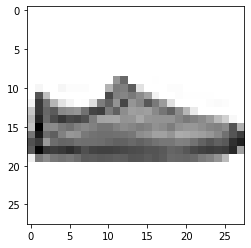

Значение сети: Pullover


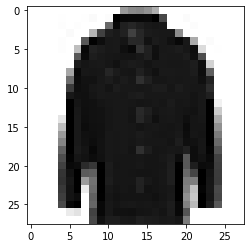

Значение сети: Sandal


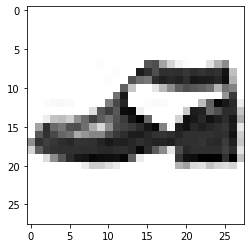

Значение сети: Pullover


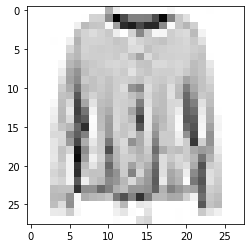

Значение сети: T-shirt/top


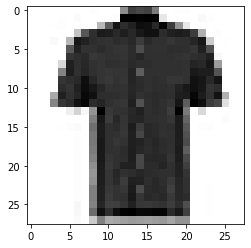

In [118]:
for i in range(5):
    print(f'Значение сети: {cat_to_str[p_false[i]]}')
    plt.imshow(x_false[i].reshape(x_false[n].shape[0], x_false[n].shape[1]), cmap=plt.cm.binary)
    plt.show()

In [119]:
activation_model = keras.Model(inputs=model.input, outputs=model.layers[0].output) # Создание "Урезанной" модели, для демонстрации карт признаков.
# В outputs задается конечный слой. Их можно посмотреть, на моменте создания Sequential
activation_model.summary() # Вывод полученной модели

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [120]:
test_img = np.expand_dims(x_test[23], axis=0)
activation = activation_model.predict(test_img)
print(activation.shape) # Как видно теперь размер (1,28,28,32). 1 изображение размера 28х28 с 32 картами признаков (Количество карт задано при построении модели)

(1, 28, 28, 32)


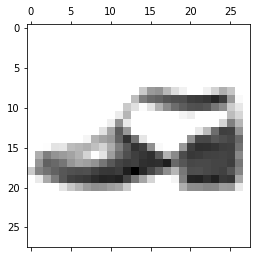

In [121]:
plt.matshow(activation[0, :, :, 1], cmap=plt.cm.binary)
# Демонстрация карты признаков [0, :, :, 1], Где 0 это первое изображение, так как мы подали модели только 1 изображение. Следующее :, : означает, что мы бере всю матрицу 28х28. 
# И последние число это номер карты признаков от 0 до 31 соответственно 

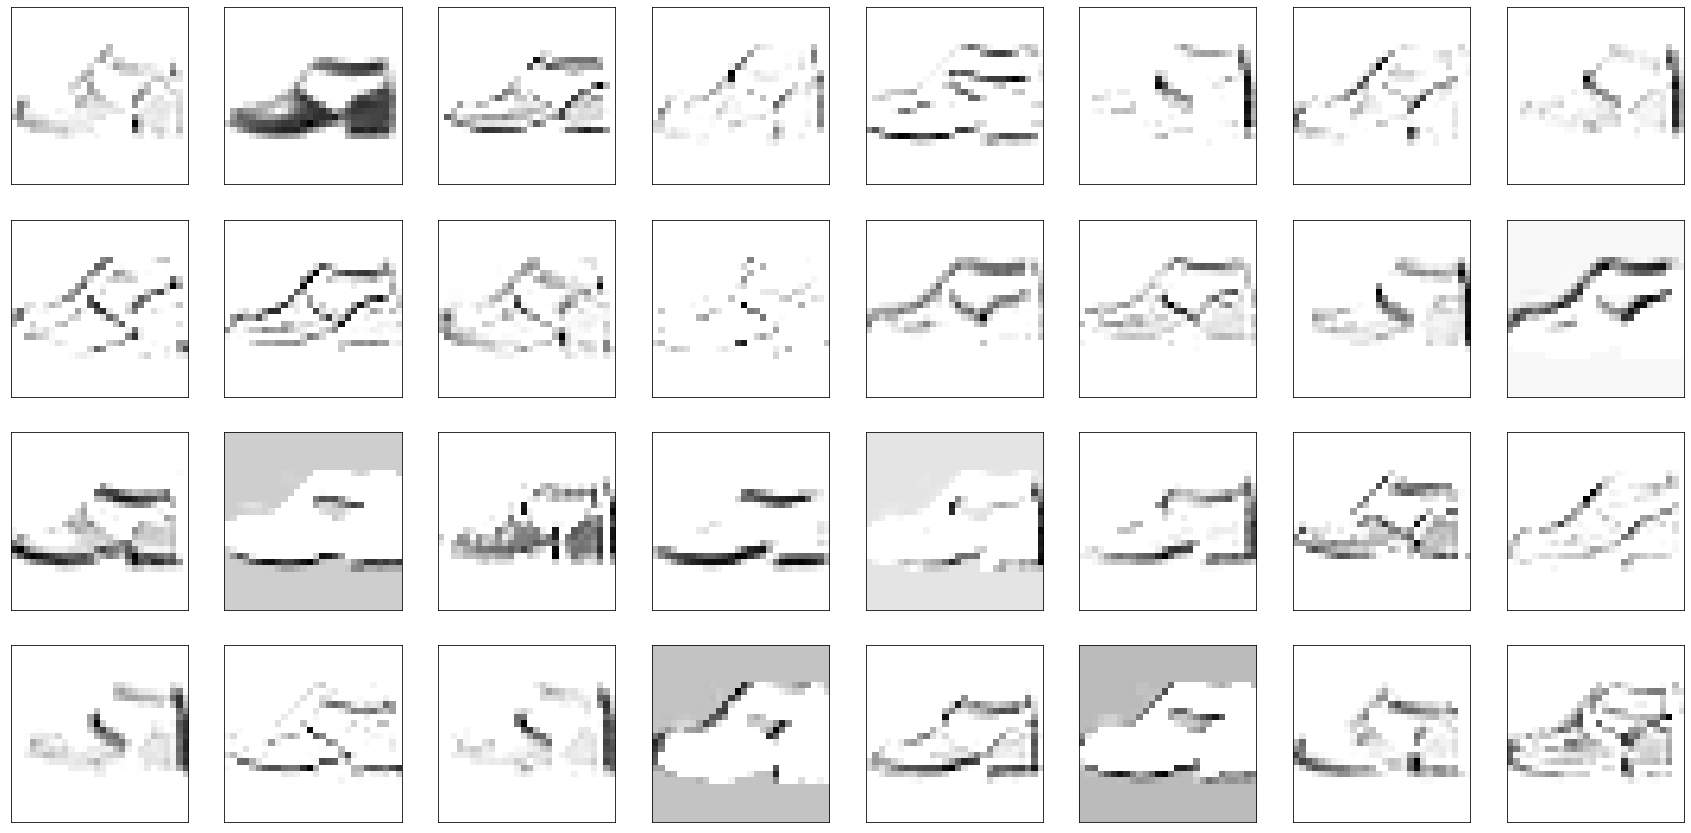

In [122]:
# Код описан ранее
plt.figure(figsize=(30,15)) # Увеличение размера изображения
for i in range(32): # Цикл на выведение изображения
    plt.subplot(4,8,i+1, autoscale_on = True) 
    plt.xticks([]) # Удаление осей координат по х
    plt.yticks([]) # Удаление осей координат по у
    plt.imshow(activation[0, :, :, i], cmap=plt.cm.binary)

plt.show() # Вывод основного изображения на экран